# Direction of Arrival with freefield  synthesis 

In [3]:
import numpy as np
from importlib import reload
from matplotlib import pyplot as plt
from mu32 import beamformer
from mu32.core import Mu32

## Globals

In [4]:
n_mics = 8
inter_mics = 0.045
sampling_frequency = 50000
c_angle = 0
antenna=[[0, 0, 0], n_mics, c_angle, inter_mics]

## Init beamformer

In [5]:
beams_number = 8
bfwin_duration = 0.1
G = beamformer.das_former( antenna, beams_number, sf=sampling_frequency, bfwin_duration=bfwin_duration )

## Init polar graphic

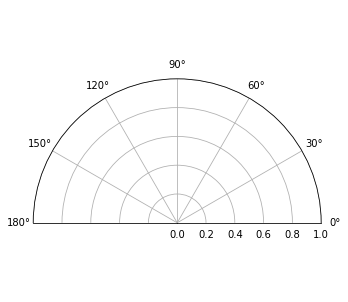

In [6]:
plt.ion()
fig = plt.figure( 1, clear = True )
axes_coords = [0., 0., 1., 1.]
ax_polar = fig.add_axes(axes_coords, projection = 'polar', label='ax_polar')
ax_polar.set_ylim(0, 1)
ax_polar.set_xlim(0, np.pi)
radii = np.zeros( ( beams_number, ) )
width = np.pi/beams_number*np.ones( ( beams_number, ) )
bars = ax_polar.bar( np.linspace(0, np.pi, beams_number), radii, width=width, bottom=0.0, alpha = 1, facecolor='r', edgecolor='k')

## Compute mean power on BFM channels

In [7]:
def callback_bfm( mu32: Mu32, data: np.ndarray ):
    """
    user callback function for data beamforming:
    convert data from 24 to 16 bits format and put it in the external queue
    """

    signal = data.reshape( mu32.buffer_length, mu32.mems_number )
    powers, beams_number = beamformer.das_doa( G, signal.T, sf=sampling_frequency, bfwin_duration=bfwin_duration )

    for power, bar in zip( powers[:,0], bars ):
        bar.set_height( power )

In [9]:
try:
	mu32 = Mu32()
	mu32.run( 
		callback_fn=callback_bfm, 	# the user defined data processing function
		mems=(0, 1, 2, 3, 4, 5, 6, 7),				# activated mems	
		duration = 0,
		buffer_length = 5000,
		buffers_number = 4
	)
except:
	print( 'aborting' )

2022-03-14 14:06:26,863 [WARNING]: in mu32.logging (core.py:400): Mu32: Transfer not completed with code [6]. Complete without processing data.


USBErrorPipe: LIBUSB_ERROR_PIPE [-9]

Mu32: keyboard interruption...
